***<h3>Dataset: Attribute Types, Explanatory Variable, Outcome Variable</h3>*** 
<i>
**1. Attribute Types** refer to the nature of variables in a dataset. These include:<br>
   <br> i) Numerical attributes, which can be continuous (like income, temperature) or discrete (like the number of children, number of cars owned).<br>
ii)Categorical attributes, which represent categories or groups. These can be nominal (no inherent order, like gender or marital status) or ordinal (with a clear order, like education level or customer satisfaction rating).<br>
<br>**2.Explanatory Variables** (independent variables) are the features in a dataset used to explain or predict the outcome. They are considered the inputs in a machine learning model.<br>
<br>**3.Outcome Variable** (dependent variable) is the target we want to predict or explain. It is the result or output that depends on the explanatory variables.
</i>



***<h3>Why EDA?</h3>***
<i>
Exploratory Data Analysis (EDA) is vital because it helps in identifying important features, relationships between variables, and potential problems like missing data, outliers, and skewed distributions. EDA allows us to better understand the dataset and choose the appropriate modeling techniques. It also aids in hypothesis generation and testing, verifying assumptions, and ultimately ensuring that the data is fit for model building.
</i>

***<h3>Univariate Graphical EDA: Histograms, Boxplots</h3>***
<i>
•	**Histograms** are used to visualize the distribution of a single continuous variable, providing insight into the shape of the data, such as whether it is normally distributed or skewed.<br><br>
•	**Boxplots** give a summary of the distribution, central tendency, and variability of a variable, and highlight the presence of outliers through the use of quartiles and whiskers. They are particularly useful for identifying the spread and range of the data.
</i>

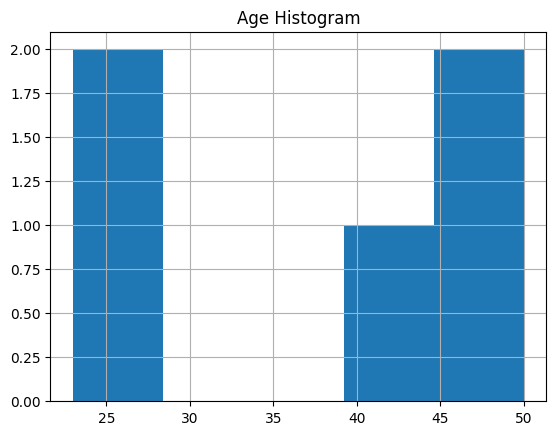

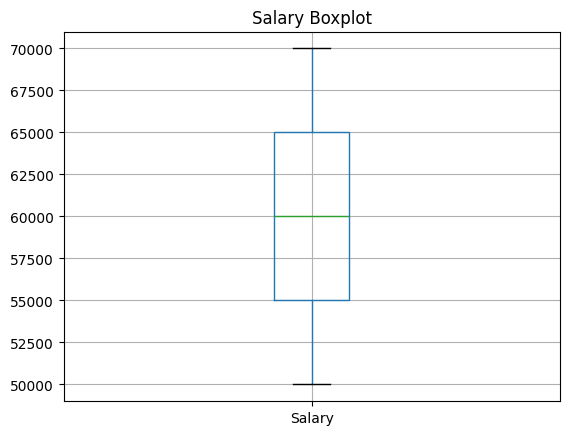

In [8]:
#Univariate Graphical EDA: Histograms, Boxplots

import pandas as pd
import matplotlib.pyplot as plt

# Define DataFrame
df = pd.DataFrame({
    'Age': [23, 45, 28, 50, 40],
    'Salary': [50000, 60000, 55000, 70000, 65000]
})

# Plot
df['Age'].hist(bins=5)
plt.title('Age Histogram')
plt.show()

df.boxplot(column='Salary')
plt.title('Salary Boxplot')
plt.show()


***<h3>Univariate Non-Graphical EDA: Frequency Distribution Table, Measures of Central Tendency, and Dispersion</h3>***
<i>
•	**Frequency Distribution** Tables provide a summary of the occurrence of different categories or values within a dataset. For categorical variables, they show how often each category appears, while for continuous variables, they can be grouped into intervals.<br><br>
•	**Measures of Central Tendency** (mean, median, and mode) are used to describe the central value or typical value of a dataset. The mean gives the average, the median provides the middle value, and the mode identifies the most frequent value.<br><br>
•	**Measures of Dispersion** (range, variance, and standard deviation) provide information about the spread of the data, helping to understand how much variability there is within the dataset. Dispersion helps to identify the consistency and predictability of the data.<br>
</i>

In [16]:
#Univariate Non-Graphical EDA: Frequency Distribution Table, Measures of Central Tendency, and Dispersion

import pandas as pd

# DataFrame
df = pd.DataFrame({
     'Age': [23, 45, 28, 50, 40],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Salary': [50000, 60000, 55000, 70000, 65000]
})

# EDA Steps
print("Frequency Distribution:\n", df['Gender'].value_counts())
print("\nMean Salary:", df['Salary'].mean())
print("Median Salary:", df['Salary'].median())
print("Mode Salary:", df['Salary'].mode()[0])
print("\nRange:", df['Salary'].max() - df['Salary'].min())
print("Std Dev:", df['Salary'].std())


Frequency Distribution:
 Gender
Female    3
Male      2
Name: count, dtype: int64

Mean Salary: 60000.0
Median Salary: 60000.0
Mode Salary: 50000

Range: 20000
Std Dev: 7905.694150420948


In [17]:
print(df.columns)

Index(['Age', 'Gender', 'Salary'], dtype='object')


***<h3>Multivariate Graphical EDA: Scatter Plot, Heatmap</h3>***
<i>
•	**Scatter Plots** graphically display the relationship between two continuous variables, showing how one variable changes in response to another.They are useful for identifying trends, correlations, or patterns such as linear or non-linear relationships between the variables.<br><br>
•	**Heatmaps** are used to represent a matrix of values, typically a correlation matrix, with colors indicating the magnitude of the relationships between variables. Heatmaps allow quick visual interpretation of complex datasets and are useful for identifying strong relationships between variables.>


<Axes: xlabel='Age', ylabel='Salary'>

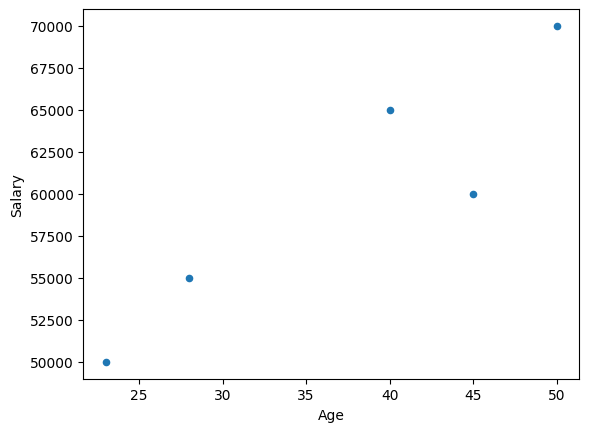

In [18]:
# Multivariate Graphical EDA: Scatter Plot, Heatmap

df.plot.scatter(x='Age', y='Salary')

<Axes: >

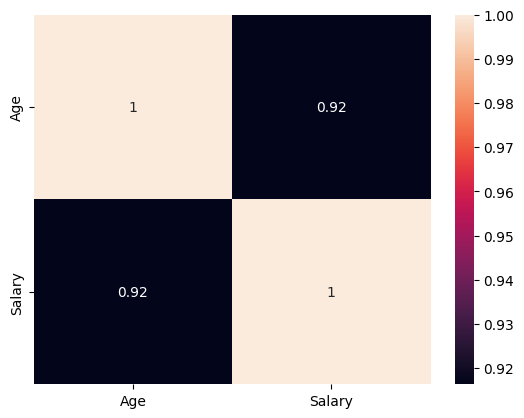

In [19]:
import seaborn as sns

# Only numeric data for correlation
sns.heatmap(df.select_dtypes('number').corr(), annot=True)


***<h3>Multivariate Non-Graphical EDA: Cross-tabulation, Correlation Matrix</h3>***<i>
•	**Cross-tabulation** is a method for examining the relationship between two categorical variables by summarizing the data into a table. It helps in identifying how categories of one variable are distributed across the categories of another.<br><br>
•	**Correlation Matrix** is a table that displays the correlation coefficients between pairs of numerical variables in a dataset. It helps to understand the strength and direction of relationships between variables, guiding decisions about which features to use in a model or how multicollinearity may impact the model.


In [21]:
#Multivariate Non-Graphical EDA: Cross-tabulation, Correlation Matrix
import pandas as pd
# Existing DataFrame
df = pd.DataFrame({
    'Age': [23, 45, 28, 50, 40],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Salary': [50000, 60000, 55000, 70000, 65000]
})

# Adding 'Purchased' column
df['Purchased'] = ['Yes', 'No', 'Yes', 'No', 'Yes']

# Display the updated DataFrame
print(df)


   Age  Gender  Salary Purchased
0   23    Male   50000       Yes
1   45  Female   60000        No
2   28  Female   55000       Yes
3   50    Male   70000        No
4   40  Female   65000       Yes


In [24]:
#Cross-tabulation
pd.crosstab(df['Gender'], df['Purchased'])

Purchased,No,Yes
Gender,,
Female,1,2
Male,1,1


In [25]:
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include='number')

# Compute the correlation matrix
df_numeric.corr()


,Age,Salary
Age,1.000000,0.916313
Salary,0.916313,1.000000


***<h3>What is Data Preprocessing?</h3>***
<i>
Data Preprocessing refers to the steps taken to clean and transform raw data into a format that is suitable for machine learning models. It is a crucial step because raw data often contains noise, missing values, inconsistencies, or irrelevant features that can hinder model performance. Data preprocessing helps to improve the accuracy and efficiency of models.


***<h3>Key Steps in Data Preprocessing:</h3>***

1. ***Handling Missing Data***
*Missing data can occur for various reasons (e.g., incomplete surveys, errors in data collection) and must be dealt with before applying any machine learning algorithms. The main techniques include:*<br>
•	***Removal of missing data:*** *Only used when the number of missing values is small, as removing data can result in a loss of information.*<br>
•	***Imputation:*** *Replacing missing data with substituted values such as:*<br>
*o	<u>Mean/Median/Mode Imputation:</u> For numerical variables, replace missing values with the mean or median; for categorical variables, use the mode (most frequent value).*<br>
o	<u>Advanced Methods:</u> *Techniques like k-nearest neighbors (KNN) imputation or model-based imputation can be used for more accurate substitution.*|

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

***<h3>1. Handling Missing Data </h3>***
***Example 1: Removing Missing Data***<br>
*Suppose you have a dataset with missing values in the "Age" column. If only 2% of the data is missing, you might decide to drop rows where "Age" is missing.*

In [27]:
data=pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\synthetic_dataset.csv")
data

,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,PhD,185.445550,60.334218
1,69.0,5703.638303,Male,PhD,NaN,63.698056
2,46.0,24053.066630,Male,PhD,164.825507,60.729456
3,32.0,22769.668320,Female,Master,170.989043,68.862954
4,150.0,18206.967860,Female,Master,162.810347,51.948157
5,25.0,5633.592022,Male,High School,180.575685,80.912694
6,38.0,13947.908180,Female,PhD,250.000000,66.827711
7,NaN,37010.387870,Male,High School,150.259243,82.786132
8,36.0,40557.899320,Female,NaN,181.394721,69.269831
9,40.0,32268.198870,Male,PhD,159.713698,84.080683


In [28]:
#Explanation: Here, rows with missing "Age" values are removed,....... 
#reducing data size but retaining only complete records.
missing_val = data.dropna(subset=['Age'], inplace=True)
missing_val      #row 16 gets deleted
print("Data without any mission Value:\n")
data

Data without any mission Value:



,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,PhD,185.445550,60.334218
1,69.0,5703.638303,Male,PhD,NaN,63.698056
2,46.0,24053.066630,Male,PhD,164.825507,60.729456
3,32.0,22769.668320,Female,Master,170.989043,68.862954
4,150.0,18206.967860,Female,Master,162.810347,51.948157
5,25.0,5633.592022,Male,High School,180.575685,80.912694
6,38.0,13947.908180,Female,PhD,250.000000,66.827711
8,36.0,40557.899320,Female,NaN,181.394721,69.269831
9,40.0,32268.198870,Male,PhD,159.713698,84.080683
10,28.0,46683.539530,Male,Master,153.547046,67.031228


***Example 2: Imputation***<br>
*For datasets with a larger percentage of missing values, imputing the missing data is better. In this case, you replace missing "Age" values with the column’s mean value.*<br>

In [29]:
data=pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\synthetic_dataset.csv")
data

,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,PhD,185.445550,60.334218
1,69.0,5703.638303,Male,PhD,NaN,63.698056
2,46.0,24053.066630,Male,PhD,164.825507,60.729456
3,32.0,22769.668320,Female,Master,170.989043,68.862954
4,150.0,18206.967860,Female,Master,162.810347,51.948157
5,25.0,5633.592022,Male,High School,180.575685,80.912694
6,38.0,13947.908180,Female,PhD,250.000000,66.827711
7,NaN,37010.387870,Male,High School,150.259243,82.786132
8,36.0,40557.899320,Female,NaN,181.394721,69.269831
9,40.0,32268.198870,Male,PhD,159.713698,84.080683


In [34]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data    # 7 and 16 row 
#Explanation: Missing values are replaced by the mean of the "Age" column, 
#retaining more data and reducing bias.

,Age,Price,Gender,Education,Height,Weight
0,56.000000,12437.012260,Female,PhD,185.445550,60.334218
1,69.000000,5703.638303,Male,PhD,NaN,63.698056
2,46.000000,24053.066630,Male,PhD,164.825507,60.729456
3,32.000000,22769.668320,Female,Master,170.989043,68.862954
4,150.000000,18206.967860,Female,Master,162.810347,51.948157
5,25.000000,5633.592022,Male,High School,180.575685,80.912694
6,38.000000,13947.908180,Female,PhD,250.000000,66.827711
7,45.368421,37010.387870,Male,High School,150.259243,82.786132
8,36.000000,40557.899320,Female,NaN,181.394721,69.269831
9,40.000000,32268.198870,Male,PhD,159.713698,84.080683


***<h3>2. Handling Outliers</h3>***
*Outliers are extreme values that differ significantly from the rest of the data. They can distort the training of machine learning models by pulling the results toward them.<br>
•	**Detecting Outliers:** Using methods like the z-score, IQR (Interquartile Range), or visualization tools like boxplots.<br>
•	**Dealing with Outliers:-<br>**
o	**Remove:** If the outlier is an error or anomaly.<br>
o	**Cap:** Limiting the extreme values to the 95th or 5th percentile to reduce their impact.<br>
o	**Transform:** Applying transformations like log or square root to reduce the effect of the outliers.*


***Example: Removing Outliers using IQR Method***<br>
*In a dataset with house prices, you detect outliers in the "Price" column using the interquartile range (IQR).

In [35]:
data=pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\synthetic_dataset.csv")
data

,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,PhD,185.445550,60.334218
1,69.0,5703.638303,Male,PhD,NaN,63.698056
2,46.0,24053.066630,Male,PhD,164.825507,60.729456
3,32.0,22769.668320,Female,Master,170.989043,68.862954
4,150.0,18206.967860,Female,Master,162.810347,51.948157
5,25.0,5633.592022,Male,High School,180.575685,80.912694
6,38.0,13947.908180,Female,PhD,250.000000,66.827711
7,NaN,37010.387870,Male,High School,150.259243,82.786132
8,36.0,40557.899320,Female,NaN,181.394721,69.269831
9,40.0,32268.198870,Male,PhD,159.713698,84.080683


In [36]:
#load data
data=pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\synthetic_dataset.csv")

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'Salary' column
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR




,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,PhD,185.445550,60.334218
1,69.0,5703.638303,Male,PhD,NaN,63.698056
2,46.0,24053.066630,Male,PhD,164.825507,60.729456
3,32.0,22769.668320,Female,Master,170.989043,68.862954
5,25.0,5633.592022,Male,High School,180.575685,80.912694
6,38.0,13947.908180,Female,PhD,250.000000,66.827711
7,NaN,37010.387870,Male,High School,150.259243,82.786132
8,36.0,40557.899320,Female,NaN,181.394721,69.269831
9,40.0,32268.198870,Male,PhD,159.713698,84.080683
10,28.0,46683.539530,Male,Master,153.547046,67.031228


In [39]:
IQR

19.5

In [40]:
Q1

30.0

In [41]:
Q3

49.5

In [37]:

# Remove outliers from the 'Salary' column
data_cleaned = data[~((data['Age'] < lower_bound) | (data['Age'] > upper_bound))]

# Display the cleaned data
data_cleaned


,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,PhD,185.445550,60.334218
1,69.0,5703.638303,Male,PhD,NaN,63.698056
2,46.0,24053.066630,Male,PhD,164.825507,60.729456
3,32.0,22769.668320,Female,Master,170.989043,68.862954
5,25.0,5633.592022,Male,High School,180.575685,80.912694
6,38.0,13947.908180,Female,PhD,250.000000,66.827711
7,NaN,37010.387870,Male,High School,150.259243,82.786132
8,36.0,40557.899320,Female,NaN,181.394721,69.269831
9,40.0,32268.198870,Male,PhD,159.713698,84.080683
10,28.0,46683.539530,Male,Master,153.547046,67.031228


In [43]:
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
print("outliers\n",outliers) 

outliers
      Age        Price  Gender Education      Height     Weight
4  150.0  18206.96786  Female    Master  162.810347  51.948157


*Explanation: This method removes values that fall outside 1.5 times the IQR range, effectively eliminating extreme outliers.*

***<h3>3. Encoding Categorical Data</h3>***
*Machine learning algorithms typically work with numerical data, so categorical variables need to be converted into a numerical format. Common methods include:<br>
•	**Label Encoding:** Assigns a unique integer to each category. This is best for ordinal variables where there is a meaningful order (e.g., low, medium, high).<br>
•	**One-Hot Encoding:** Converts categories into binary vectors, suitable for nominal variables (those without an inherent order).*


***Example 1: Label Encoding***<br>
*Suppose you have a categorical column "Education" with values like "Bachelor," "Master," and "PhD." Label encoding assigns integers to each category.*

In [45]:
#load data
data=pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\synthetic_dataset.csv")


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Education'] = le.fit_transform(data['Education'])
le

LabelEncoder()

In [196]:
data
#Explanation: Each unique category is replaced with a number 
#(e.g., "Bachelor" → 0, "Master" → 1, "PhD" → 2).

,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,3,185.445550,60.334218
1,69.0,5703.638303,Male,3,NaN,63.698056
2,46.0,24053.066630,Male,3,164.825507,60.729456
3,32.0,22769.668320,Female,2,170.989043,68.862954
4,150.0,18206.967860,Female,2,162.810347,51.948157
5,25.0,5633.592022,Male,1,180.575685,80.912694
6,38.0,13947.908180,Female,3,250.000000,66.827711
7,NaN,37010.387870,Male,1,150.259243,82.786132
8,36.0,40557.899320,Female,4,181.394721,69.269831
9,40.0,32268.198870,Male,3,159.713698,84.080683


***Example 2: One-Hot Encoding***<br>
*If the "Gender" column contains "Male" and "Female," one-hot encoding creates new binary columns for each category.*

In [199]:
#load data
data=pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\synthetic_dataset.csv")
data

,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,PhD,185.445550,60.334218
1,69.0,5703.638303,Male,PhD,NaN,63.698056
2,46.0,24053.066630,Male,PhD,164.825507,60.729456
3,32.0,22769.668320,Female,Master,170.989043,68.862954
4,150.0,18206.967860,Female,Master,162.810347,51.948157
5,25.0,5633.592022,Male,High School,180.575685,80.912694
6,38.0,13947.908180,Female,PhD,250.000000,66.827711
7,NaN,37010.387870,Male,High School,150.259243,82.786132
8,36.0,40557.899320,Female,NaN,181.394721,69.269831
9,40.0,32268.198870,Male,PhD,159.713698,84.080683


In [201]:
# Apply one-hot encoding to the 'Gender' column and drop the original 'Female' category (drop_first=True)
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# View the updated dataframe
data


# Convert the 'Gender_Male' column from True/False to 1/0
data['Gender_Male'] = data['Gender_Male'].astype(int)

# Explanation: One-hot encoding creates a binary column, "Gender_Male," where 1 indicates "Male" and 0 indicates "Female."

In [202]:
data3

,Age,Price,Education,Height,Weight,Gender_Male
0,56.0,12437.012260,PhD,185.445550,60.334218,0
1,69.0,5703.638303,PhD,NaN,63.698056,1
2,46.0,24053.066630,PhD,164.825507,60.729456,1
3,32.0,22769.668320,Master,170.989043,68.862954,0
4,150.0,18206.967860,Master,162.810347,51.948157,0
5,25.0,5633.592022,High School,180.575685,80.912694,1
6,38.0,13947.908180,PhD,250.000000,66.827711,0
7,NaN,37010.387870,High School,150.259243,82.786132,1
8,36.0,40557.899320,NaN,181.394721,69.269831,0
9,40.0,32268.198870,PhD,159.713698,84.080683,1


***<h3>4. Feature Scaling</h3>***
*Feature scaling ensures that the numerical values of features are within the same range, which is critical for algorithms like gradient descent and distance-based models (e.g., k-NN, SVM).<br>
•	**Standardization:** Centers data around a mean of 0 and scales it based on the standard deviation (unit variance). Useful when data follows a normal distribution.<br>
•	**Min-Max Scaling:** Rescales the data to a fixed range, usually [0, 1]. This is important for models like neural networks where inputs must be normalized.*


***Example 1: Standardization***<br>
*In a dataset with features like "Age" and "Income," standardization ensures all features have a mean of 0 and a standard deviation of 1.*

In [173]:
#load data
data=pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\synthetic_dataset.csv")
data

,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,PhD,185.445550,60.334218
1,69.0,5703.638303,Male,PhD,NaN,63.698056
2,46.0,24053.066630,Male,PhD,164.825507,60.729456
3,32.0,22769.668320,Female,Master,170.989043,68.862954
4,150.0,18206.967860,Female,Master,162.810347,51.948157
5,25.0,5633.592022,Male,High School,180.575685,80.912694
6,38.0,13947.908180,Female,PhD,250.000000,66.827711
7,NaN,37010.387870,Male,High School,150.259243,82.786132
8,36.0,40557.899320,Female,NaN,181.394721,69.269831
9,40.0,32268.198870,Male,PhD,159.713698,84.080683


In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[['Age', 'Price']])
df_scaled

#Explanation: This process scales the data to have a mean of 0 and variance of 1, 
#which is critical for algorithms sensitive to feature scaling like SVM.

array([[ 0.38518908, -0.84925226],
       [ 0.85618761, -1.18785219],
       [ 0.02288252, -0.26511788],
       [-0.48434667, -0.3296559 ],
       [ 3.79087076, -0.55909957],
       [-0.73796126, -1.19137459],
       [-0.26696273, -0.77327412],
       [        nan,  0.38646453],
       [-0.33942404,  0.56485759],
       [-0.19450142,  0.14799495],
       [-0.62926929,  0.87289652],
       [-0.62926929,  0.25009063],
       [-0.15827076,  0.84723244],
       [ 0.27649711,  3.55401151],
       [ 0.42141974, -0.20617099],
       [-0.15827076, -1.00733173],
       [        nan, -0.38410882],
       [-0.23073207,  0.29028942],
       [-0.9553452 ,  0.28368423],
       [-0.15827076,  0.11481579],
       [-0.81042257, -0.55909957]])

***Example 2: Min-Max Scaling***<br>
*For features like "Age," you scale the values to a range between 0 and 1 using Min-Max scaling.*

In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(data[['Age']])
df_scaled

#Explanation: Min-Max scaling adjusts the "Age" values to fit within a specified range (usually [0,1]), 
#ensuring all features are on a similar scale.

array([[0.28244275],
       [0.38167939],
       [0.20610687],
       [0.09923664],
       [1.        ],
       [0.04580153],
       [0.14503817],
       [       nan],
       [0.12977099],
       [0.16030534],
       [0.06870229],
       [0.06870229],
       [0.16793893],
       [0.25954198],
       [0.29007634],
       [0.16793893],
       [       nan],
       [0.15267176],
       [0.        ],
       [0.16793893],
       [0.03053435]])

***<h3>5. Normalization</h3>***

*Normalization refers to scaling individual samples (rows) so that they have a unit norm (i.e., the length of the vector representing the data point is 1). This is particularly useful for algorithms like **k-NN** and **SVM** that are sensitive to the magnitude of the data.*


***Example: L2 Normalization***<br>
*When you have a dataset with features like "Height" and "Weight," normalization ensures that each feature vector has a unit norm (length of 1).*

In [205]:
#load data
data=pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\synthetic_dataset.csv")
data

,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,PhD,185.445550,60.334218
1,69.0,5703.638303,Male,PhD,NaN,63.698056
2,46.0,24053.066630,Male,PhD,164.825507,60.729456
3,32.0,22769.668320,Female,Master,170.989043,68.862954
4,150.0,18206.967860,Female,Master,162.810347,51.948157
5,25.0,5633.592022,Male,High School,180.575685,80.912694
6,38.0,13947.908180,Female,PhD,250.000000,66.827711
7,NaN,37010.387870,Male,High School,150.259243,82.786132
8,36.0,40557.899320,Female,NaN,181.394721,69.269831
9,40.0,32268.198870,Male,PhD,159.713698,84.080683


In [212]:
from sklearn.preprocessing import Normalizer  

#to use normalization first we have to handle missing values
data['Height'] = data['Height'].fillna(data['Height'].mean())
data    # 7 and 16 row 

,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,PhD,185.445550,60.334218
1,69.0,5703.638303,Male,PhD,173.664531,63.698056
2,46.0,24053.066630,Male,PhD,164.825507,60.729456
3,32.0,22769.668320,Female,Master,170.989043,68.862954
4,150.0,18206.967860,Female,Master,162.810347,51.948157
5,25.0,5633.592022,Male,High School,180.575685,80.912694
6,38.0,13947.908180,Female,PhD,250.000000,66.827711
7,NaN,37010.387870,Male,High School,150.259243,82.786132
8,36.0,40557.899320,Female,NaN,181.394721,69.269831
9,40.0,32268.198870,Male,PhD,159.713698,84.080683


In [213]:
normalizer = Normalizer()
df_normalized = normalizer.fit_transform(data[['Height', 'Weight']])
df_normalized

#Explanation: L2 normalization scales the values of "Height" and "Weight" for each data point so that 
#the magnitude of the vector is 1. This is useful for algorithms like k-NN and SVM.

array([[0.95093693, 0.30938481],
       [0.93883951, 0.34435501],
       [0.93833523, 0.34572676],
       [0.92759989, 0.37357522],
       [0.95268055, 0.3039733 ],
       [0.91257539, 0.4089085 ],
       [0.96607983, 0.25824361],
       [0.87586235, 0.48256103],
       [0.93420117, 0.35674664],
       [0.88487062, 0.46583686],
       [0.91647618, 0.40008926],
       [0.93999493, 0.3411884 ],
       [0.8998718 , 0.43615449],
       [0.91680619, 0.39933245],
       [0.91350568, 0.40682598],
       [0.87948781, 0.47592141],
       [0.9572386 , 0.28929962],
       [0.9328657 , 0.36022435],
       [0.86081947, 0.50891044],
       [0.49085697, 0.87124017],
       [0.93489826, 0.35491582]])

***<h3>6. Discretization</h3>***
*Discretization transforms continuous features into discrete intervals (bins). This can simplify data and make it easier to interpret or use in certain machine learning models (e.g., decision trees).<br>
•	**Equal-width Binning:** Divides the range of the data into equal intervals.<br>
•	**Equal-frequency Binning:** Divides the data such that each bin has approximately the same number of observations.*


***Example: Equal-width Binning***<br>
You have a continuous variable "Age" that you want to group into categories like "Young," "Middle-aged," and "Old." Using equal-width binning, you divide the "Age" data into equal intervals.

In [218]:
df_discretized= data['Age_group'] = pd.cut(data['Age'], bins=3, labels=['Young', 'Middle-aged', 'Old'])


df_discretized

#Explanation: The continuous "Age" data is divided into three equal-sized bins, 
#each assigned a label, which simplifies analysis.

0           Young
1     Middle-aged
2           Young
3           Young
4             Old
5           Young
6           Young
7             NaN
8           Young
9           Young
10          Young
11          Young
12          Young
13          Young
14          Young
15          Young
16            NaN
17          Young
18          Young
19          Young
20          Young
Name: Age, dtype: category
Categories (3, object): ['Young' < 'Middle-aged' < 'Old']

***<h3>Why is Data Preprocessing Important?</h3>***
*•	**Improves Model Accuracy:** By ensuring that the data fed into the model is clean, well-formatted, and relevant, preprocessing increases the likelihood that the model will identify meaningful patterns and relationships.<br>
•	**Reduces Overfitting:** Proper handling of outliers and irrelevant features can prevent the model from learning noise in the data, which would hurt its ability to generalize to new data.<br>
•	**Increases Model Efficiency:** Preprocessed data leads to faster model training and reduces the computational load during the training process.*



***<h3>Common Exam Questions on Data Preprocessing:</h3>***

***1.Consequences of Not Handling Missing Data Properly:***<br>
   *- **Biased Models**: Missing data can lead to biased estimates if the missingness is not random. For example, if certain groups are more likely to have missing data, the model may not represent those groups accurately.*<br>
   *- **Reduced Accuracy**: Missing data can reduce the accuracy of models because the algorithms may not be able to learn from incomplete information. This can lead to overfitting on the available data or underfitting if the model cannot generalize well.*<br>
   *- **Errors in Training**: Some algorithms cannot handle missing values directly and may throw errors during training. This can disrupt the entire modeling process.*

***2.Importance of Feature Scaling for Algorithms like SVM and k-NN:***<br>
   <i>- **SVM (Support Vector Machines)**: SVM aims to find a hyperplane that maximizes the margin between classes. Feature scaling ensures that all features contribute equally to the distance calculations, leading to a more effective separation of classes. Without scaling, features with larger ranges could disproportionately influence the decision boundary.*</i><br>
   <i>- **k-NN (k-Nearest Neighbors)**: k-NN relies on distance metrics (e.g., Euclidean distance) to classify data points. Features with different ranges can distort the distance calculations, leading to inaccurate nearest neighbor searches. Scaling ensures that each feature contributes equally to the distance measure.</i>

***3.Handling Categorical Data:***<br>
   *- **Label Encoding**: This method assigns a unique integer to each category. It’s useful when categorical features have a meaningful ordinal relationship (e.g., "low," "medium," "high"). However, for non-ordinal categories, label encoding can introduce unintended ordinal relationships.*<br>
   *- **One-Hot Encoding**: This method creates a binary column for each category. It’s suitable for nominal categorical features where there is no inherent order. One-hot encoding prevents the model from assuming any ordinal relationship and helps in better capturing categorical information.*

***4.Methods to Detect and Handle Outliers:***<br>
   *- **Z-score Method**: This technique calculates the standard score (Z-score) of data points. A high absolute Z-score indicates that the data point is far from the mean and could be an outlier. Typically, Z-scores beyond ±3 are considered outliers.*<br>
   *- **IQR (Interquartile Range) Method**: This method calculates the range between the 25th (Q1) and 75th (Q3) percentiles. Outliers are identified as data points that fall below <i>Q1 - 1.5 × IQR</i> or above <i>Q3 + 1.5 × IQR</i>. This method is useful for detecting outliers in a more robust way that is less sensitive to extreme values.*

In [48]:
data

,Age,Price,Gender,Education,Height,Weight
0,56.0,12437.012260,Female,PhD,185.445550,60.334218
1,69.0,5703.638303,Male,PhD,NaN,63.698056
2,46.0,24053.066630,Male,PhD,164.825507,60.729456
3,32.0,22769.668320,Female,Master,170.989043,68.862954
4,150.0,18206.967860,Female,Master,162.810347,51.948157
5,25.0,5633.592022,Male,High School,180.575685,80.912694
6,38.0,13947.908180,Female,PhD,250.000000,66.827711
7,NaN,37010.387870,Male,High School,150.259243,82.786132
8,36.0,40557.899320,Female,NaN,181.394721,69.269831
9,40.0,32268.198870,Male,PhD,159.713698,84.080683


In [52]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


data = pd.get_dummies(data, columns=['Gender'], drop_first=True)


In [53]:

# Load the dataset
data = pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\synthetic_dataset.csv")

# Display the first few rows of the dataset
print(data.head())

# Define independent variables (features) and target
# Replace 'Target' with the actual name of your target column in the dataset
X = data.drop(columns=['Height'])  # Assuming 'Target' is the column to predict
y = data['Height']

# Initialize the model
model = LogisticRegression()

# Apply RFE for feature selection
rfe = RFE(model, n_features_to_select=2)
rfe = rfe.fit(X, y)

# Selected features
print(f"Selected Features: {X.columns[rfe.support_]}")


     Age         Price  Gender Education      Height     Weight
0   56.0  12437.012260  Female       PhD  185.445550  60.334218
1   69.0   5703.638303    Male       PhD         NaN  63.698056
2   46.0  24053.066630    Male       PhD  164.825507  60.729456
3   32.0  22769.668320  Female    Master  170.989043  68.862954
4  150.0  18206.967860  Female    Master  162.810347  51.948157


ValueError: could not convert string to float: 'Female'

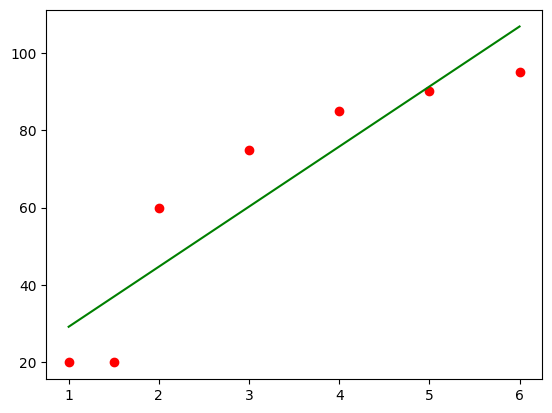

In [60]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,1.5,2,3,4,5,6]
y = [20, 20, 60, 75, 85, 90, 95]

# change the last 1 to a 2 or 5 to generate the other plots further down
mymodel = np.poly1d(np.polyfit(x, y, 1))

myline = np.linspace(1, 6, 100)

plt.scatter(x, y, color ='red')
plt.plot(myline, mymodel(myline), color ='green')
plt.show()

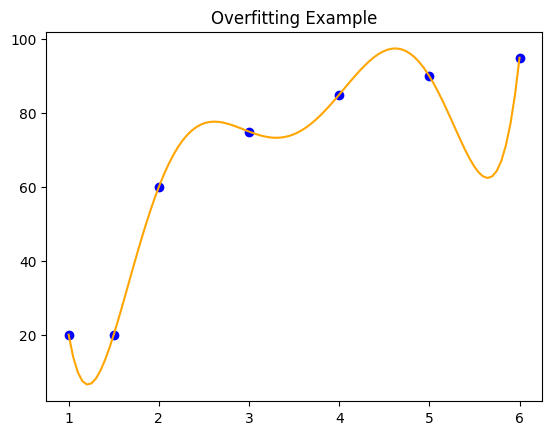

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array([1, 1.5, 2, 3, 4, 5, 6])
y = np.array([20, 20, 60, 75, 85, 90, 95])

# Fit a high-degree polynomial (degree 6)
coefficients = np.polyfit(x, y, 6)
polynomial_model = np.poly1d(coefficients)

# Generate points for the plot
x_line = np.linspace(1, 6, 100)
y_line = polynomial_model(x_line)

# Plot
plt.scatter(x, y, color='blue')  # Data points
plt.plot(x_line, y_line, color='orange')  # Polynomial line
plt.title('Overfitting Example')
plt.show()


***<h3>Simple Linear Regression With scikit-learn</h3>***
<i>There are five basic steps when you’re implementing linear regression:
<br>
1. Import the packages and classes that you need.<br>
2. Provide data to work with, and eventually do appropriate <br>
3. Create a regression model and fit it with existing data.<br>
4. Check the results of model fitting to know whether the model is satisfactory.<br>
5. Apply the model for predictions. <br>
These steps are more or less general for most of the regression approaches and implementations. Throughout the rest of the tutorial, you’ll learn how to do these steps for several different scenarios.</i>


***Step 1: Import packages and classes***
<br>
<i>The first step is to import the package numpy and the class LinearRegression from sklearn.linear_model:</i>



In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

<i>
Now, you have all the functionalities that you need to implement linear regression.

<br>The fundamental data type of NumPy is the array type called numpy.ndarray. The rest of this tutorial uses the term array to refer to instances of the type numpy.ndarray.

You’ll use the class sklearn.linear_model.LinearRegression to perform linear and polynomial regression and make predictions accordingly.</i>

***Step 2: Provide data or load the data***<br>
<i>
The second step is defining data to work with. The inputs (regressors, 𝑥) and output (response, 𝑦) should be arrays or similar objects. This is the simplest way of providing data for regression:</i>

In [5]:
data = pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
model = LinearRegression()

In [9]:
X = data.drop('Profit',axis=1)   
y = data['Profit']

In [12]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [13]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [32]:
encoded = pd.get_dummies(data,drop_first=True)   #pd.get_dummies() converts these strings into numeric binary columns.
encoded


,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False
5,131876.90,99814.71,362861.36,156991.12,False,True
6,134615.46,147198.87,127716.82,156122.51,False,False
7,130298.13,145530.06,323876.68,155752.60,True,False
8,120542.52,148718.95,311613.29,152211.77,False,True
9,123334.88,108679.17,304981.62,149759.96,False,False


<i>Avoiding Multicollinearity with drop_first=True:
<i><br>
In one-hot encoding, one category column is redundant because the information can be inferred from the others. This redundancy can lead to multicollinearity in linear models.<br>
To avoid this, **drop_first=True** drops the first category, and the remaining columns are sufficient to represent all categories</i>

In [33]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined (e.g., from a pandas DataFrame or numpy array)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train and y_train for training your model
# X_test and y_test will be used for testing the model's performance


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming X is a pandas DataFrame
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
X_encoded = encoder.fit_transform(X)


In [38]:

# Fit your model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [39]:
y_pred = model.predict(X_test)


In [40]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1165672057.4489129


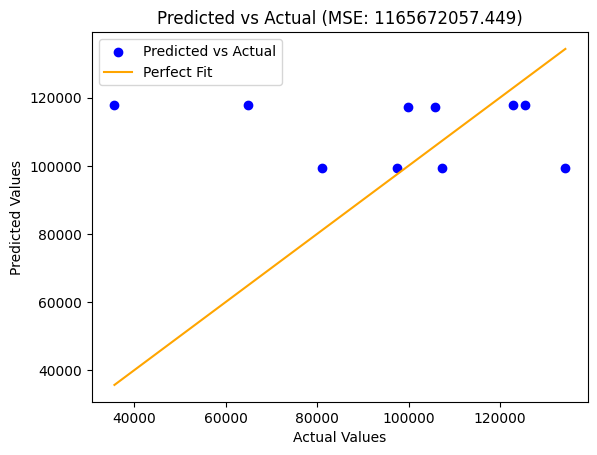

In [51]:
# Plot Predicted vs Actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='-', label='Perfect Fit')

# Add labels, title, and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs Actual (MSE: {mse:.3f})')
plt.legend()

# Show the plot
plt.show()


**Interpretation:**<br>

<i>1. The scatter plot allows you to visually assess how well the model's predictions match the actual data.<br>
2. If most points are clustered near the red dashed line (perfect fit line), this indicates that the model is performing well.<br>
3. If points deviate significantly from the red line, it suggests that the model is making poor predictions for those data points.<br>
4. The Mean Squared Error (MSE) in the title gives a quantitative measure of the average squared difference between the predicted and actual values—the lower, the better.</i>

In [64]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Load the dataset
data = pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\50_Startups.csv")
data



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [65]:
# 2. Separate features (X) and target (y)
X = data.drop('Profit', axis=1)  # Features
y = data['Profit']  # Target



In [66]:
# 3. Handle categorical variables using One-Hot Encoding
# Identify which columns are categorical (like 'State' in this case)
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

# Apply One-Hot Encoding to the categorical column(s)
X_encoded = pd.DataFrame(encoder.fit_transform(X[['State']]), columns=encoder.get_feature_names_out())

# Drop the original 'State' column from X and concatenate the encoded columns
X = X.drop('State', axis=1)  # Drop the original 'State' column
X = pd.concat([X, X_encoded], axis=1)  # Concatenate the encoded variables


In [67]:

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [68]:
# 5. Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [69]:
# 6. Make predictions on the test set
y_pred = model.predict(X_test)



In [70]:
# 7. Evaluate the model with Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 82010363.04430111


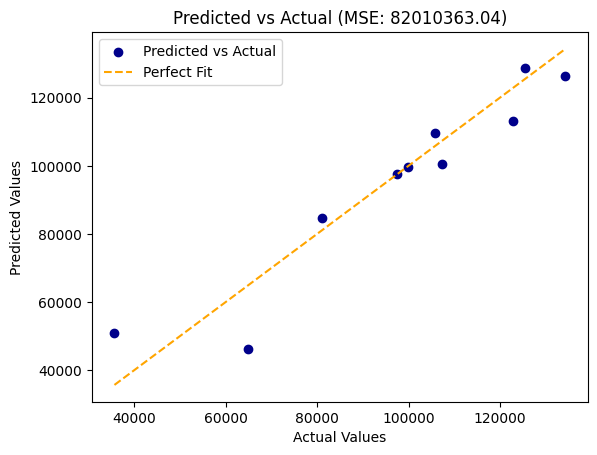

In [75]:
# 8. Visualize the results with a Predicted vs Actual plot
plt.scatter(y_test, y_pred, color='darkblue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='--', label='Perfect Fit')

# Add labels, title, and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs Actual (MSE: {mse:.2f})')
plt.legend()

# Show the plot
plt.show()


***Polynomial Regression*** 

In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [78]:
# 1. Load the dataset
data = pd.read_csv("D:\\OneDrive\\sem 5\\Machine learning\\files\\50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [80]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer

PolynomialFeatures(include_bias=False)

In [82]:
transformer.fit(X)


PolynomialFeatures(include_bias=False)

In [88]:
X_ = transformer.transform(X)

In [99]:
X_

array([[1.65349200e+05, 1.36897800e+05, 4.71784100e+05, 0.00000000e+00,
        1.00000000e+00, 2.73403579e+10, 2.26359417e+10, 7.80091235e+10,
        0.00000000e+00, 1.65349200e+05, 1.87410076e+10, 6.45862054e+10,
        0.00000000e+00, 1.36897800e+05, 2.22580237e+11, 0.00000000e+00,
        4.71784100e+05, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.62597700e+05, 1.51377590e+05, 4.43898530e+05, 0.00000000e+00,
        0.00000000e+00, 2.64380120e+10, 2.46136480e+10, 7.21768800e+10,
        0.00000000e+00, 0.00000000e+00, 2.29151748e+10, 6.71962897e+10,
        0.00000000e+00, 0.00000000e+00, 1.97045905e+11, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.53441510e+05, 1.01145550e+05, 4.07934540e+05, 1.00000000e+00,
        0.00000000e+00, 2.35442970e+10, 1.55199259e+10, 6.25940918e+10,
        1.53441510e+05, 0.00000000e+00, 1.02304223e+10, 4.12607634e+10,
        1.01145550e+05, 0.00000000e+00, 1.66410589e+11, 4.0793

In [100]:
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [101]:
model = LinearRegression().fit(X_, y)
model

LinearRegression()

In [102]:
r_sq = model.score(X_, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")


coefficient of determination: 0.9644503223240473
intercept: 815.1590894694091
coefficients: [ 6.13671487e-01  3.62393739e-01  2.76749988e-01  1.63250173e+04
  1.15979996e+04 -9.97309708e-07  1.67601361e-06  6.93798076e-07
 -6.64733822e-02 -1.01037994e-01 -4.60440420e-07 -1.70984330e-06
 -1.35652653e-01 -6.01547731e-02 -1.01865919e-07 -5.74018179e-02
 -4.18903737e-02  1.63250525e+04  0.00000000e+00  1.15979879e+04]


In [103]:
model = LinearRegression(fit_intercept=False).fit(X_, y)


In [104]:
r_sq = model.score(X_, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")


coefficient of determination: 0.9644492399318054
intercept: 0.0
coefficients: [ 6.08974132e-01  3.73638847e-01  2.79259320e-01  1.63681524e+04
  1.17401236e+04 -1.00080049e-06  1.70793866e-06  6.97176503e-07
 -6.58854378e-02 -1.00787480e-01 -4.99346489e-07 -1.72608728e-06
 -1.36023793e-01 -6.19401071e-02 -1.02752421e-07 -5.78338440e-02
 -4.22326296e-02  1.63681520e+04  0.00000000e+00  1.17401126e+04]


In [108]:
y_pred = model.predict(X_)
print(f"predicted response:\n{y_pred}")


predicted response:
[183979.13012998 197764.37656908 183585.23093438 171024.41856
 175246.22108699 165035.65913911 155390.67620334 151899.85762696
 146204.8409643  162110.42584866 134993.56293457 138329.57559233
 127815.15561805 131410.67346821 142682.35896912 143752.56675799
 121204.46346687 127441.20566445 129759.7189994  118664.10914405
 122933.90235993 112515.12103642 113679.42511847 113246.88551483
 110530.57479061 102583.40521914 111911.74906273 113061.49431491
 104507.59362274 106480.91230341 100677.0210388  103324.51951171
  92938.01024462 101660.19556141  88868.8311446   95122.43716472
  76118.70847917  86248.02234724  75923.61905871  80386.69482577
  73074.25026174  80475.0781514   65987.68473579  66959.17966506
  65449.03896099  55245.29091716  52125.63461539  41442.51863383
  38594.65551199  40159.8155287 ]


In [109]:
print(f"predicted response:\n{y_pred}")

predicted response:
[183979.13012998 197764.37656908 183585.23093438 171024.41856
 175246.22108699 165035.65913911 155390.67620334 151899.85762696
 146204.8409643  162110.42584866 134993.56293457 138329.57559233
 127815.15561805 131410.67346821 142682.35896912 143752.56675799
 121204.46346687 127441.20566445 129759.7189994  118664.10914405
 122933.90235993 112515.12103642 113679.42511847 113246.88551483
 110530.57479061 102583.40521914 111911.74906273 113061.49431491
 104507.59362274 106480.91230341 100677.0210388  103324.51951171
  92938.01024462 101660.19556141  88868.8311446   95122.43716472
  76118.70847917  86248.02234724  75923.61905871  80386.69482577
  73074.25026174  80475.0781514   65987.68473579  66959.17966506
  65449.03896099  55245.29091716  52125.63461539  41442.51863383
  38594.65551199  40159.8155287 ]


In [111]:
print(f"coefficients:\n{model.coef_}")
print(f"predicted response:\n{y_pred}")

coefficients:
[ 6.08974132e-01  3.73638847e-01  2.79259320e-01  1.63681524e+04
  1.17401236e+04 -1.00080049e-06  1.70793866e-06  6.97176503e-07
 -6.58854378e-02 -1.00787480e-01 -4.99346489e-07 -1.72608728e-06
 -1.36023793e-01 -6.19401071e-02 -1.02752421e-07 -5.78338440e-02
 -4.22326296e-02  1.63681520e+04  0.00000000e+00  1.17401126e+04]
predicted response:
[183979.13012998 197764.37656908 183585.23093438 171024.41856
 175246.22108699 165035.65913911 155390.67620334 151899.85762696
 146204.8409643  162110.42584866 134993.56293457 138329.57559233
 127815.15561805 131410.67346821 142682.35896912 143752.56675799
 121204.46346687 127441.20566445 129759.7189994  118664.10914405
 122933.90235993 112515.12103642 113679.42511847 113246.88551483
 110530.57479061 102583.40521914 111911.74906273 113061.49431491
 104507.59362274 106480.91230341 100677.0210388  103324.51951171
  92938.01024462 101660.19556141  88868.8311446   95122.43716472
  76118.70847917  86248.02234724  75923.61905871  80386.69